In [18]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import statistics
from sklearn.base import clone
from collections import Counter
import seaborn as sns

# Import the Data set

In [3]:
## Load the data
with open('../../data/ass2.pickle', 'rb') as f:
    data = pickle.load(f)

Example of a sample

In [4]:
## Example of train sample
df = pd.DataFrame(data['train'])
print(df.iloc[0])

f0        1
f1        0
f2        0
f3        0
f4        0
f5        0
f6        2
f7        1
f8        2
f9        2
f10       1
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       1
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
f30       0
f31       0
f32       0
f33       0
f34       0
f35       0
f36       2
f37       0
f38       0
f39       0
f40       0
f41       0
target    2
Name: 51905, dtype: int64


Extract train, dev, test datasets (x and y)

In [5]:
## Get train dev test Xs and ys (X type is dataFrame and y type is Series)
df_train = data['train']
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

df_dev = data['dev']
X_dev = df_dev.iloc[:, :-1]
y_dev = df_dev.iloc[:, -1]

df_test = data['test']
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Preliminary data analysis

In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"X_dev shape: {X_dev.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (40533, 42)
X_dev shape: (13512, 42)
X_test shape: (13512, 42)


In [13]:
# count the number of samples for each label in the train dataset
print(f"Distribution of labels in the train dataset, order from most common to least: {list(Counter(y_train).items())}")

Distribution of labels in the train dataset, order from most common to least: [(2, 26734), (1, 9882), (0, 3917)]


#### We can see that this is a classification problem and that the data is not balanced

In [15]:
# check if there are missing values
print(f"Number of missing values in the train dataset: {X_train.isnull().sum().sum()}")

Number of missing values in the train dataset: 0


<Axes: >

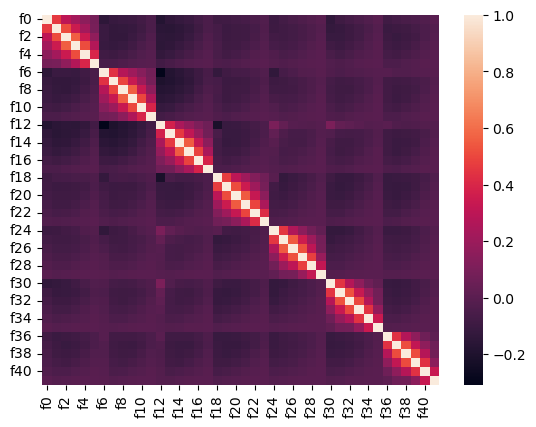

In [19]:
# check correlation between features
sns.heatmap(X_train.corr())

#### We can see that there is a high correlation between adjacent features

array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>,
        <Axes: title={'center': 'f2'}>, <Axes: title={'center': 'f3'}>,
        <Axes: title={'center': 'f4'}>, <Axes: title={'center': 'f5'}>],
       [<Axes: title={'center': 'f6'}>, <Axes: title={'center': 'f7'}>,
        <Axes: title={'center': 'f8'}>, <Axes: title={'center': 'f9'}>,
        <Axes: title={'center': 'f10'}>, <Axes: title={'center': 'f11'}>],
       [<Axes: title={'center': 'f12'}>, <Axes: title={'center': 'f13'}>,
        <Axes: title={'center': 'f14'}>, <Axes: title={'center': 'f15'}>,
        <Axes: title={'center': 'f16'}>, <Axes: title={'center': 'f17'}>],
       [<Axes: title={'center': 'f18'}>, <Axes: title={'center': 'f19'}>,
        <Axes: title={'center': 'f20'}>, <Axes: title={'center': 'f21'}>,
        <Axes: title={'center': 'f22'}>, <Axes: title={'center': 'f23'}>],
       [<Axes: title={'center': 'f24'}>, <Axes: title={'center': 'f25'}>,
        <Axes: title={'center': 'f26'}>, <Ax

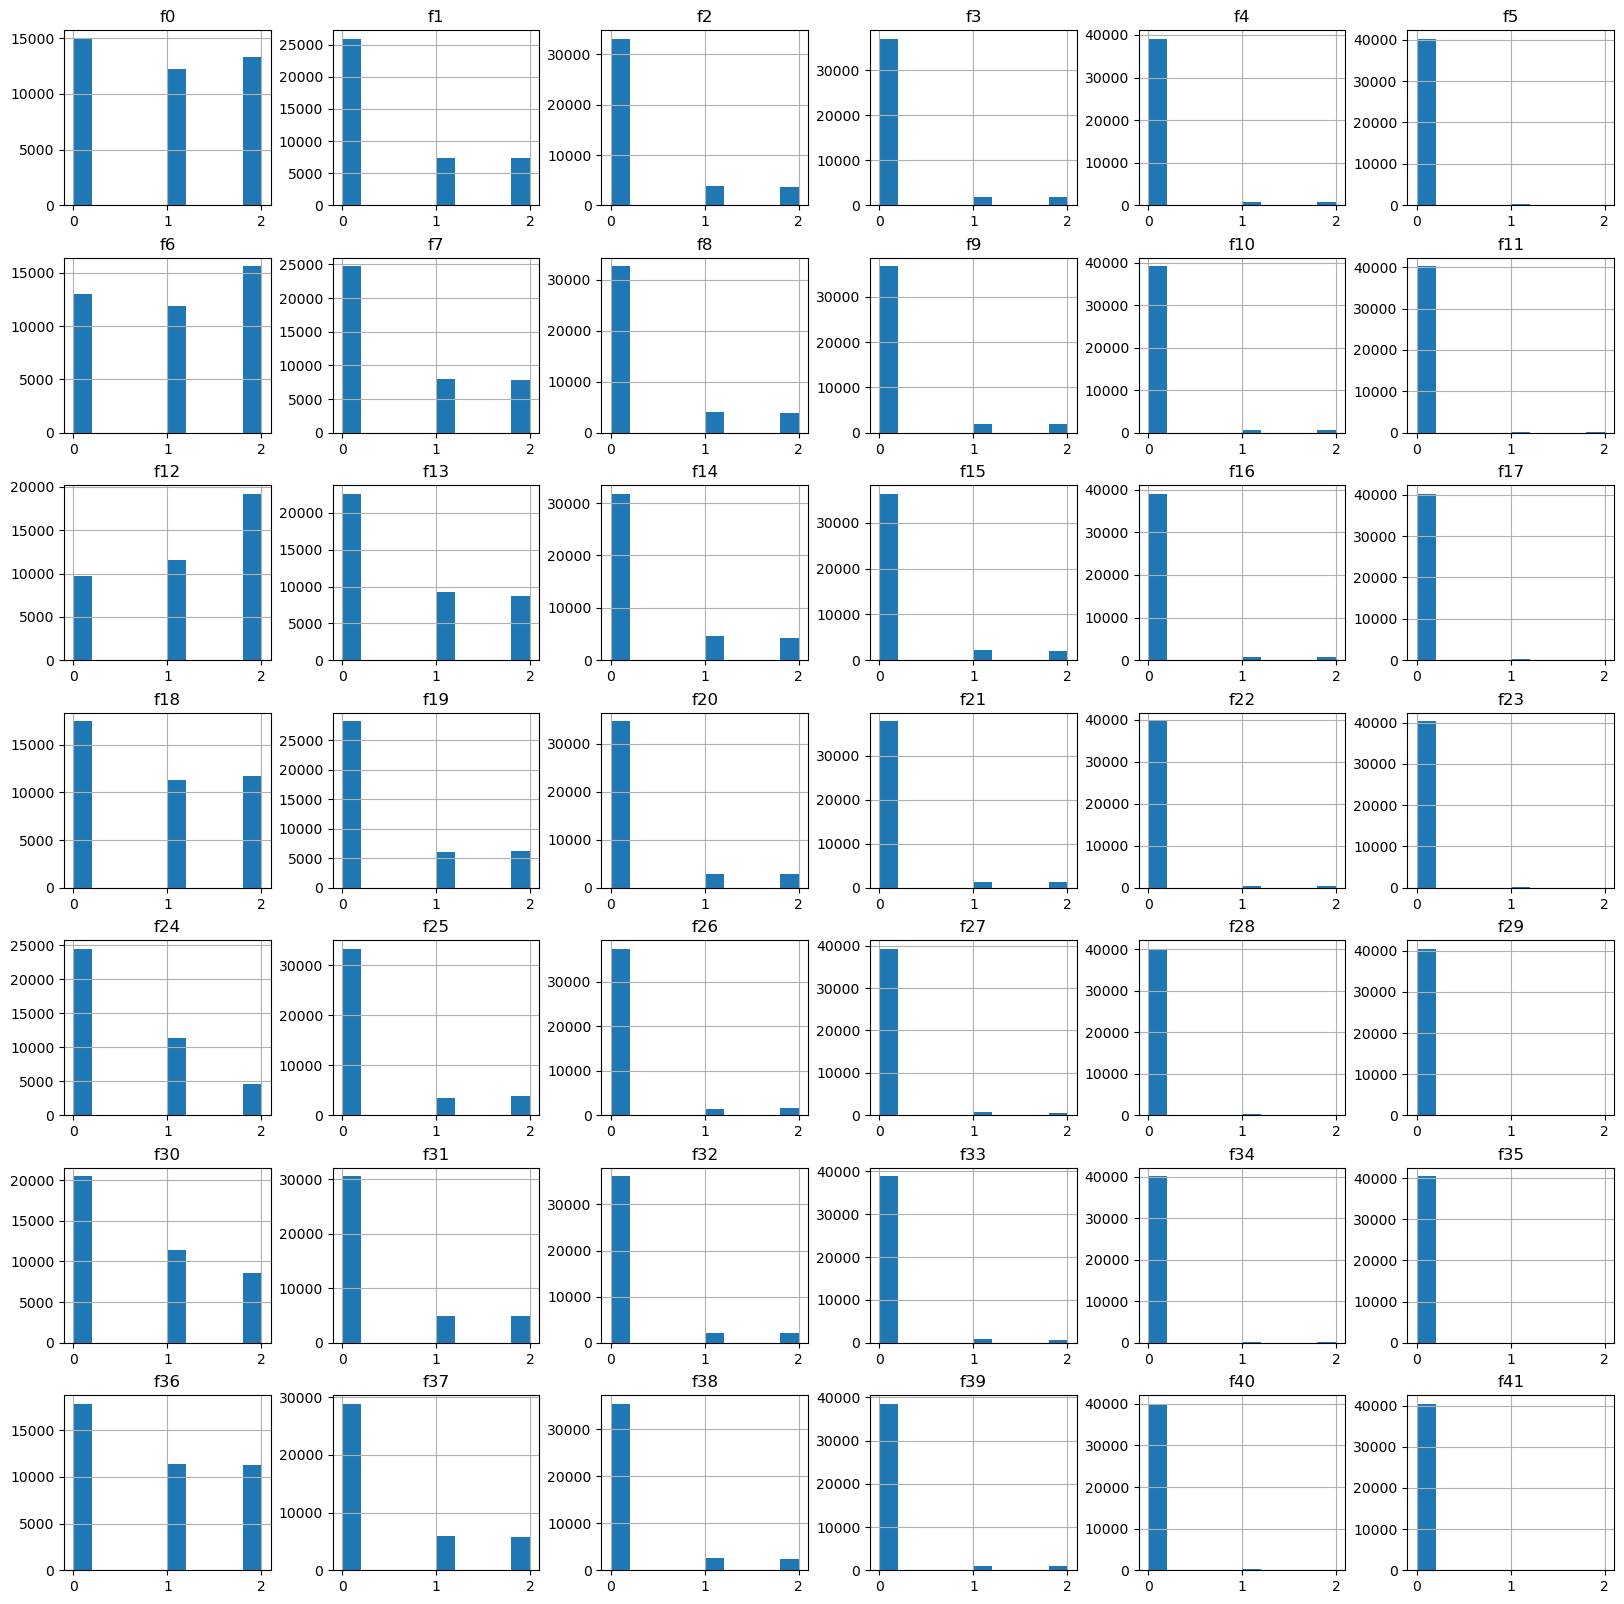

In [20]:
# show the distribution of the features
X_train.hist(figsize=(20, 20))
# TODO: what do we understand from this? i.e. f5 is always 0 maybe we can discard it?

# Models

In [81]:
## Train the model using logistic regression
regressor = LogisticRegression(max_iter=10000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.6595618709295441


In [82]:
## Train the model using more models
model = DecisionTreeClassifier()
#model = linear_model.Perceptron() 0.48
#model = linear_model.SGDClassifier() #0.65
#model = linear_model.RidgeClassifier() # 0.65
model.fit(X_train,y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print(acc)

0.7249851983422143


Trying training the model with kfold method

In [83]:
## union dev and train datasets (for using in kfold)
print(X_train.shape)
print(X_dev.shape)
X_trainDev = pd.concat([X_train, X_dev], axis=0)
y_trainDev = pd.concat([y_train, y_dev], axis=0)

(40533, 42)
(13512, 42)


In [84]:
## defining a helper of kfold on train and dev datasets

def runKfold(model,X,y):
  kf = KFold(n_splits=5,shuffle=True)
  accs = []
  for train_index, test_index in kf.split(X.values):
      print(test_index)
      #print(len(train_index), train_index)
      #print(len(test_index), test_index)
      X_subtrain, X_subtest = X.values[train_index], X.values[test_index]
      y_subtrain, y_subtest = y.values[train_index], y.values[test_index]
      print(X_subtrain.shape, X_subtest.shape)
      cloned_model = clone(model)
      cloned_model.fit(X_subtrain,y_subtrain)
      acc = accuracy_score(y_subtest, cloned_model.predict(X_subtest))
      accs.append(acc)
      print(acc)

  print('mean', statistics.mean(accs))

In [85]:
## trying several models using kfold

#model = DecisionTreeClassifier() ## 0.72
#runKfold(model, X_trainDev, y_trainDev)
#model = LogisticRegression(max_iter=10000) ## 0.66
##runKfold(model, X_trainDev, y_trainDev)
runKfold(model, X_trainDev, y_trainDev)

[    3     4     8 ... 54033 54034 54044]
(43236, 42) (10809, 42)
0.7214358405032844
[    6    12    23 ... 54040 54041 54043]
(43236, 42) (10809, 42)
0.7183828291238783
[    1     2     5 ... 54028 54032 54042]
(43236, 42) (10809, 42)
0.7239337589046165
[    7     9    16 ... 54024 54027 54036]
(43236, 42) (10809, 42)
0.7328152465537978
[    0    10    18 ... 54022 54029 54035]
(43236, 42) (10809, 42)
0.7238412434082709
mean 0.7240817836987696


Trying tto balance the data by reducong the number of samples

In [86]:
## balance the data

# find l_min the number corresponding to the label with the least samples
l_min = y_trainDev.value_counts().min()
print(f"l_min: {l_min}")

# create a balanced dataset with l_min samples for each label
X_balanced = pd.DataFrame()
y_balanced = pd.Series(dtype="float64")
for label in y_trainDev.unique():
    X_balanced = pd.concat([X_balanced, X_trainDev[y_trainDev == label].sample(l_min)])
    y_balanced = pd.concat([y_balanced, pd.Series([label] * l_min, dtype="float64")])
print(f"X_balanced shape: {X_balanced.shape}")
print(f"y_balanced shape: {y_balanced.shape}")

l_min: 5187
X_balanced shape: (15561, 42)
y_balanced shape: (15561,)


In [87]:
model = DecisionTreeClassifier() ## 0.57
runKfold(model, X_balanced, y_balanced)
model = LogisticRegression(max_iter=10000) ## 0.42
runKfold(model, X_balanced, y_balanced)

[   28    29    31 ... 15555 15556 15558]
(12448, 42) (3113, 42)
0.5650497911982011
[    5    14    18 ... 15543 15544 15559]
(12449, 42) (3112, 42)
0.574228791773779
[    1     2     4 ... 15542 15553 15560]
(12449, 42) (3112, 42)
0.570694087403599
[    3     7    11 ... 15546 15552 15557]
(12449, 42) (3112, 42)
0.5613753213367609
[    0     8     9 ... 15536 15550 15551]
(12449, 42) (3112, 42)
0.5796915167095116
mean 0.5702079016843703
[    4     5     7 ... 15554 15557 15560]
(12448, 42) (3113, 42)
0.4259556697719242
[    6     8    18 ... 15552 15556 15558]
(12449, 42) (3112, 42)
0.4116323907455013
[    2    15    19 ... 15543 15547 15559]
(12449, 42) (3112, 42)
0.43316195372750643
[    3    11    13 ... 15548 15549 15555]
(12449, 42) (3112, 42)
0.4318766066838046
[    0     1    10 ... 15536 15542 15545]
(12449, 42) (3112, 42)
0.4318766066838046
mean 0.4269006455225082
